In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
import scipy.stats as stats

### Business Problem 1

### BACKGROUND:
#### The Lending Club is a peer-to-peer lending site where members make loans to each other. The site makes anonymized data on loans and borrowers publicly available. 
### BUSINESS PROBLEM:
#### Using lending club loans data, the team would like to test below hypothesis on how different factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)


In [573]:
file_path= 'C:/Users/DELL/Desktop/Python case studies/Basic Statistics- Hypothesis Testing'

In [574]:
loan_data= pd.read_csv(file_path+'/LoansData.csv')

In [575]:
loan_data.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [576]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [577]:
# Removing duplicates, if any.

loan_data.drop_duplicates(inplace=True)

In [578]:
#Changing type of ratio columns

loan_data['Interest.Rate']= loan_data['Interest.Rate']=loan_data['Interest.Rate'].str.replace('%','').astype('float64')
loan_data['Debt.To.Income.Ratio']= loan_data['Debt.To.Income.Ratio'].str.replace('%','').astype('float64')

In [579]:
#checking for continuous or categorical variable

loan_data.nunique()

Amount.Requested                   380
Amount.Funded.By.Investors         710
Interest.Rate                      275
Loan.Length                          2
Loan.Purpose                        14
Debt.To.Income.Ratio              1669
State                               46
Home.Ownership                       5
Monthly.Income                     632
FICO.Range                          38
Open.CREDIT.Lines                   29
Revolving.CREDIT.Balance          2349
Inquiries.in.the.Last.6.Months      10
Employment.Length                   11
dtype: int64

In [580]:
loan_data.isna().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

In [581]:
# checking if we can fill employment length as mode of the employment length data 

77/2500*100 <5

True

In [582]:
#Filling null values for continuous variables with their mean and for categorical variables with their mode. 

loan_data['Amount.Requested'].fillna(value= round(loan_data['Amount.Requested'].mean(),2), inplace=True)
loan_data['Amount.Funded.By.Investors'].fillna(value= round(loan_data['Amount.Funded.By.Investors'].mean(),2), inplace=True)
loan_data['Interest.Rate'].fillna(value= round(loan_data['Interest.Rate'].mean(),2), inplace=True)
loan_data['Debt.To.Income.Ratio'].fillna(value= round(loan_data['Debt.To.Income.Ratio'].mean(),2), inplace=True)
loan_data['Home.Ownership'].fillna(value= loan_data['Home.Ownership'].mode().item(), inplace=True)
loan_data['Monthly.Income'].fillna(value= round(loan_data['Monthly.Income'].mean(),2), inplace=True)
loan_data['FICO.Range'].fillna(value= loan_data['FICO.Range'].mode().item(), inplace=True)
loan_data['Open.CREDIT.Lines'].fillna(value= loan_data['Open.CREDIT.Lines'].mode().item(), inplace=True)
loan_data['Revolving.CREDIT.Balance'].fillna(value= round(loan_data['Revolving.CREDIT.Balance'].mean(),2), inplace=True)
loan_data['Inquiries.in.the.Last.6.Months'].fillna(value= loan_data['Inquiries.in.the.Last.6.Months'].mode().item(), inplace=True)
loan_data['Employment.Length'].fillna(value= loan_data['Employment.Length'].mode().item(), inplace=True)


In [583]:
# Checking for null values

loan_data.isna().sum()

Amount.Requested                  0
Amount.Funded.By.Investors        0
Interest.Rate                     0
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              0
State                             0
Home.Ownership                    0
Monthly.Income                    0
FICO.Range                        0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Employment.Length                 0
dtype: int64

### a. Interest rate is varied for different loan amounts (Less interest charged for high loan amounts)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Interest.Rate', ylabel='Amount.Requested'>

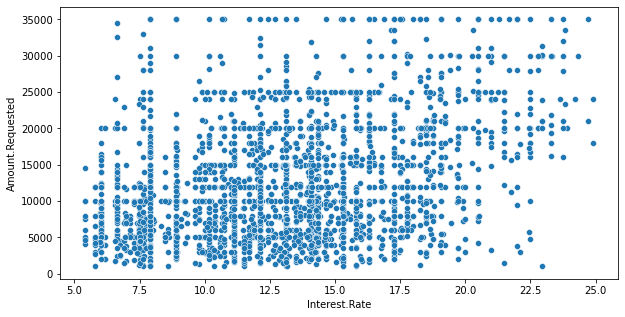

In [587]:
plt.figure(figsize=(10,5))
sns.scatterplot(loan_data['Interest.Rate'],loan_data['Amount.Requested'])

In [588]:
# Conducting the correlation test to check the relationship

stats.pearsonr(loan_data['Interest.Rate'],loan_data['Amount.Requested'])

(0.33244655278869883, 1.4146738186956556e-65)

In [613]:
pvalue_1= stats.pearsonr(loan_data['Interest.Rate'],loan_data['Amount.Requested'])[1]
pvalue_1

1.4146738186956556e-65

In [614]:
# Checking if p value is greater than or less than 0.05.

if(pvalue_1<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We reject null hypothesis


### b. Loan length is directly effecting interest rate.

In [615]:
loan_data.groupby(loan_data['Loan.Length'])['Interest.Rate'].agg([np.mean,np.std]).reset_index()

,Loan.Length,mean,std
0,36 months,12.127147,3.679458
1,60 months,16.407464,4.127213


In [616]:
# Creating data for testing our hypothesis

loans1= loan_data.loc[loan_data['Loan.Length']=='36 months', 'Interest.Rate']
loans1.head(2)

0     8.90
1    12.12
Name: Interest.Rate, dtype: float64

In [617]:
loans2= loan_data.loc[loan_data['Loan.Length']=='60 months', 'Interest.Rate' ]
loans2.head(2)

2    21.98
7    17.14
Name: Interest.Rate, dtype: float64

In [618]:
#Ratio of larger sample variance to smaller sample variance

(4.127213/3.679458)**2

1.2581895267281333

In [624]:
# performing t test of independent samples and using alternative argument to make the test one tailed. 

stats.ttest_ind(loans1,loans2, alternative='less')

Ttest_indResult(statistic=-23.410458709272653, pvalue=4.7776941834050233e-110)

In [626]:
# pvalue of the t test 

pvalue_1_b= stats.ttest_ind(loans1,loans2, alternative='less').pvalue
pvalue_1_b

4.7776941834050233e-110

In [627]:
# Checking if p value is greater than or less than 0.05.

if(pvalue_1_b<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We reject null hypothesis


### c. Interest rate varies for different purpose of loans.

In [645]:
loan_data['Loan.Purpose'].unique()

array(['debt_consolidation', 'credit_card', 'other', 'moving', 'car',
       'vacation', 'home_improvement', 'house', 'major_purchase',
       'educational', 'medical', 'wedding', 'small_business',
       'renewable_energy'], dtype=object)

In [648]:
# Creating independent samples based on different purposes of loans. 

purpose_list=[]
for i in loan_data['Loan.Purpose'].unique():
    purpose_list.append(loan_data.loc[loan_data['Loan.Purpose']==i,'Interest.Rate'])

In [649]:
# Conducting f test for different purpose samples. 

c_ftest = stats.f_oneway(purpose_list[0], purpose_list[1],purpose_list[2], purpose_list[3],purpose_list[4], purpose_list[5],
               purpose_list[6], purpose_list[7], purpose_list[8], purpose_list[9],purpose_list[10], purpose_list[11],
               purpose_list[12], purpose_list[13])
c_ftest

F_onewayResult(statistic=7.4825947670544615, pvalue=1.1602506809075995e-14)

In [650]:
# p value for different samples.

pvalue_1_c= c_ftest.pvalue
pvalue_1_c

1.1602506809075995e-14

In [651]:
# Checking if p value is greater than or less than 0.05.

if(pvalue_1_c<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We reject null hypothesis


### d. There is relationship between FICO scores and Home Ownership. It means that, people with owning home will have high FICO scores.

In [532]:
# Since FICO Scores and Home ownership are two categorical columns, we will be using chi square test to check if a relationship
# exists between them. For performing the chi square test we will be creating a crosstab of Fico scores and home ownership column. 

obs_freq= pd.crosstab(loan_data['Home.Ownership'], loan_data['FICO.Range'])
obs_freq

FICO.Range,640-644,645-649,650-654,655-659,660-664,665-669,670-674,675-679,680-684,685-689,...,780-784,785-789,790-794,795-799,800-804,805-809,810-814,815-819,820-824,830-834
Home.Ownership,,,,,,,,,,,,,,,,,,,,,
MORTGAGE,0,1,1,0,41,52,68,79,55,61,...,21,12,15,7,7,6,5,6,0,1
NONE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
OTHER,0,0,0,1,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
OWN,1,0,0,0,17,18,13,11,9,10,...,3,2,1,1,3,2,1,0,1,0
RENT,4,2,0,3,67,75,91,75,91,65,...,4,5,4,5,2,3,2,0,0,0


<AxesSubplot:xlabel='FICO.Range', ylabel='Home.Ownership'>

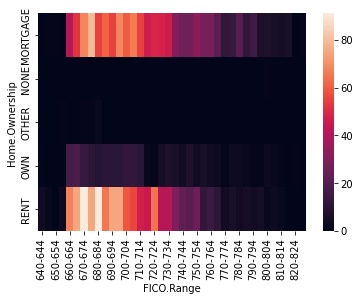

In [628]:
# Plot to see if high FICO scores are related to home ownerhip.

sns.heatmap(obs_freq)

In [629]:
# Performing chi square test 

stats.chi2_contingency(obs_freq)

(473.5648028168521,
 1.0065160858471904e-35,
 148,
 array([[2.29600e+00, 1.37760e+00, 4.59200e-01, 1.83680e+00, 5.74000e+01,
         6.65840e+01, 7.94416e+01, 7.62272e+01, 7.20944e+01, 6.24512e+01,
         6.42880e+01, 7.02576e+01, 6.01552e+01, 6.15328e+01, 5.14304e+01,
         4.27056e+01, 5.23488e+01, 4.31648e+01, 4.31648e+01, 2.98480e+01,
         2.43376e+01, 2.47968e+01, 2.80112e+01, 2.11232e+01, 2.11232e+01,
         1.65312e+01, 7.80640e+00, 1.01024e+01, 1.28576e+01, 8.72480e+00,
         9.18400e+00, 5.96960e+00, 5.96960e+00, 5.05120e+00, 3.67360e+00,
         2.75520e+00, 4.59200e-01, 4.59200e-01],
        [2.00000e-03, 1.20000e-03, 4.00000e-04, 1.60000e-03, 5.00000e-02,
         5.80000e-02, 6.92000e-02, 6.64000e-02, 6.28000e-02, 5.44000e-02,
         5.60000e-02, 6.12000e-02, 5.24000e-02, 5.36000e-02, 4.48000e-02,
         3.72000e-02, 4.56000e-02, 3.76000e-02, 3.76000e-02, 2.60000e-02,
         2.12000e-02, 2.16000e-02, 2.44000e-02, 1.84000e-02, 1.84000e-02,
         1.4

In [630]:
# p value that came from performing the chi square test.

pvalue_1_d= stats.chi2_contingency(obs_freq)[1]
pvalue_1_d

1.0065160858471904e-35

In [631]:
# Checking if p value is greater than or less than 0.05.

if(pvalue_1_d<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We reject null hypothesis


### Business Problem 2

### BACKGROUND: 
#### When an order is placed by a customer of a small manufacturing company, a price quote must be developed for that order. Because each order is unique, quotes must be established on an order-by-order basis by a pricing expert. The price quote process is labor intensive, as prices depend on many factors such as the part number, customer, geographic location, market, and order volume. The sales department manager is concerned that the pricing process is too complex, and that there might be too much variability in the quoted prices. An improvement team is tasked with studying and improving the pricing process. After interviewing experts to develop a better understanding of the current process, the team designed a study to determine if there is variability between pricing experts. That is, do different pricing experts provide different price quotes? Two randomly selected pricing experts, Mary and Barry, were asked to independently provide prices for twelve randomly selected orders. Each expert provided one price for each of the twelve orders.

### BUSINESS PROBLEM: 
#### We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

In [323]:
price_quotes_data= pd.read_csv(file_path+'/Price_Quotes.csv')

In [324]:
price_quotes_data

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [325]:
price_quotes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 416.0 bytes


In [326]:
print( 'mean price quoted by Barry :', round(price_quotes_data.Barry_Price.mean(),2), '| mean price quoted by Mary:', round(price_quotes_data.Mary_Price.mean(),2))

mean price quoted by Barry : 124.33 | mean price quoted by Mary: 114.75


In [662]:
# performing t test for independent samples since Barry's quoted prices don't depend on Mary's quoted prices. 

stats.ttest_ind(price_quotes_data.Barry_Price, price_quotes_data.Mary_Price)

Ttest_indResult(statistic=1.4147436739281787, pvalue=0.08557113066059142)

In [669]:
# p-value of the test

pvalue_2= stats.ttest_ind(price_quotes_data.Barry_Price, price_quotes_data.Mary_Price).pvalue
pvalue_2

0.17114226132118285

In [670]:
# Checking if p value is greater than or less than 0.05.

if(pvalue_2<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We fail to reject null hypothesis


### BUSINESS PROBLEM-3:
### BACKGROUND:
#### The New Life Residential Treatment Facility is a NGO that treats teenagers whohave shown signs of mental illness. It provides housing and supervision of teenagers who aremaking the transition from psychiatric hospitals back into the community. Because many of the teenagers were severely abused as children and have been involved with the juvenilejustice system, behavioral problems are common at New Life. Employee pay is low and staffturnover (attrition) is high. A reengineering program wasinstituted at New Life with the goals of lowering behavioral problems of the kids and decreasing employee turnover rates. As a part of this effort, the following changes were made:
#### * Employee shifts were shortened from 10 hours to 8 hours each day.
#### * Employees were motivated to become more involved in patient treatments. This included encouraging staff to run varioustherapeutic treatment sessions and allowing staff to have more say in program changes.
#### * The activities budget wasincreased.
#### * A facility-wide performance evaluation system was putinto place that rewarded staff participation andinnovation.
#### * Management and staff instituted a program designed to raise expectations about appropriate behavior from the kids. This included strict compliance with reporting of behavioral violations, insistence on participation in therapeutic sessions, and a lowered tolerance for even moderate behavioralinfractions.

#### To determine the effectiveness of the reengineering effort, a data set comprised of pre- and post-reengineering periods was compiled. The information contains two measures of behavioral problems. A critical incident occurs when a resident goes AWOL (leavesthe premises without permission), destroys property (e.g., punching a hole in a wall or throwing furniture through windows), is caught in possession of street drugs, or engages in assault against other residents or staff members. A teenager istemporarily removed from the facility when s/he is sent to jail or back to a psychiatric hospital

### BUSINESS PROBLEM: 
#### We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether thisis, in fact, occurring.

In [330]:
treatment_facility_data= pd.read_csv(file_path+'/Treatment_Facility.csv')

In [331]:
treatment_facility_data.head()

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


In [332]:
# Renaming VAR4 and  VAR5

treatment_facility_data.rename(columns = {'VAR4':'TFFR', 'VAR5':'CI'}, inplace = True)

In [333]:
treatment_facility_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   TFFR               20 non-null     float64
 4   CI                 20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 928.0+ bytes


In [334]:
treatment_facility_data[['Reengineer','Employee_Turnover']].pivot_table(index='Reengineer', aggfunc=['mean','std'])

,mean,std
,Employee_Turnover,Employee_Turnover
Reengineer,,
Post,18.689129,10.555509
Prior,11.735692,7.041651


In [335]:
# Calculating the ratio of the larger sample variance to the smaller sample variance. 

(10.555509/7.041651)**2

2.247032570079068

In [336]:
s1=treatment_facility_data[treatment_facility_data.Reengineer=='Prior']['Employee_Turnover']
s1

0      0.0000
1      6.0606
2     12.1212
3      3.3333
4     12.9032
5      9.6774
6     11.7647
7     11.4286
8     23.0769
9     15.0000
10    10.0000
11    26.0870
12    11.1111
Name: Employee_Turnover, dtype: float64

In [337]:
s2=treatment_facility_data[treatment_facility_data.Reengineer=='Post']['Employee_Turnover']
s2

13    26.6667
14    17.9487
15    12.8205
16    15.7895
17     0.0000
18    30.7692
19    26.8293
Name: Employee_Turnover, dtype: float64

In [338]:
stats.ttest_ind(s1,s2,equal_var=True)

Ttest_indResult(statistic=-1.770306704753604, pvalue=0.09361109345535304)

In [339]:
pvalue_3= stats.ttest_ind(s1,s2,equal_var=True).pvalue
pvalue_3

0.09361109345535304

In [340]:
# Checking if p value is greater than or less than 0.05.

if(pvalue_3<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We fail to reject null hypothesis


### Testing the effect of reengineering on critical incidents percentage.

In [341]:
treatment_facility_data[['Reengineer','CI']].pivot_table(index='Reengineer', aggfunc=['mean','std'])

,mean,std
,CI,CI
Reengineer,,
Post,23.349719,7.808181
Prior,53.887906,48.695547


In [342]:
# Calculating the ratio of the larger sample variance to the smaller sample variance. 

(48.695547/7.808181)**2

38.893654607280695

In [343]:
# creating two samples

s1_ci=treatment_facility_data[treatment_facility_data.Reengineer=='Prior']['CI']
s1_ci

0      42.682927
1      25.806452
2     146.198830
3     110.429448
4      23.952096
5      47.058824
6       0.000000
7      25.000000
8     132.183908
9      16.574586
10     88.757396
11     31.746032
12     10.152284
Name: CI, dtype: float64

In [344]:
s2_ci=treatment_facility_data[treatment_facility_data.Reengineer=='Post']['CI']
s2_ci

13    29.126214
14    21.008403
15    34.782609
16    19.900498
17     9.950249
18    25.531915
19    23.148148
Name: CI, dtype: float64

In [345]:
# performing two sample t test on it

stats.ttest_ind(s1_ci,s2_ci,equal_var=False)

Ttest_indResult(statistic=2.209006531430452, pvalue=0.045565519570193176)

In [346]:
pvalue_3_ci= stats.ttest_ind(s1_ci,s2_ci,equal_var=False).pvalue
pvalue_3_ci

0.045565519570193176

In [347]:
# Checking if p value is greater than or less than 0.05.

if(pvalue_3_ci<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We reject null hypothesis


### BUSINESS PROBLEM-4
### BACKGROUND: 
#### Software development projects typically follow six basic phases: Requirements, design, implementation (and integration), testing (validation), deployment (installation) and maintenance. First, general requirements are gathered, and the scope of the functionality is defined. Then, alternative scenarios for the required functionality are developed and evaluated. Implementation, usually 50% or more of the development time, is the phase in which the design istranslated into programs and integrated with other parts of the software – this is when software engineers actually develop the code. During the final phases, programs are tested, software is put into use, and faults or performance issues are addressed. ApDudes, a developer of applicationsfor tablet computers, was having difficulty meeting project deadlines; only 10% of their projects had been completed within budget and on time last year and that wasstarting to hurt business. The group’s project manager wastasked with studying problems within the implementation phase. He found thatsoftware engineers were having difficulty prioritizing their work, and that they often became overwhelmed by the magnitude of the projects. As a result, two changes were made. Each project was broken down into smaller, distinct tasks, or jobs, and each job was assigned a priority. The project manager believes that this classification and prioritization system would speed the completion of high priority jobs, and thuslower overall project completion time
### BUSINESS PROBLEM: 
#### We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether thisis, in fact, occurring

In [348]:
priority_assessment_data= pd.read_csv(file_path+'/Priority_Assessment.csv')

In [349]:
priority_assessment_data

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [350]:
#Checking for null values

priority_assessment_data.isna().sum()

Days        0
Priority    0
dtype: int64

In [351]:
priority_assessment_data.Priority.unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [352]:
# creating data sets based on priorities

s4_1= priority_assessment_data[priority_assessment_data.Priority=='High'].Days
s4_1

0      3.3
2      0.3
5      0.3
6      0.3
7      0.3
      ... 
631    0.3
632    1.0
635    0.1
638    0.3
641    0.5
Name: Days, Length: 326, dtype: float64

In [353]:
s4_2= priority_assessment_data[priority_assessment_data.Priority=='Medium'].Days
s4_2

1       7.9
3       0.7
4       8.6
9      15.9
11      0.3
       ... 
633     2.0
634     2.5
636     0.1
639     0.3
640     1.3
Name: Days, Length: 249, dtype: float64

In [354]:
s4_3= priority_assessment_data[priority_assessment_data.Priority=='Low'].Days
s4_3

14     23.2
15      5.3
20      4.6
23      1.8
26     17.0
       ... 
609     0.5
613     7.9
620     0.3
622     0.1
637     2.5
Name: Days, Length: 67, dtype: float64

In [355]:
print( 'Average time taken to finish "High" priority tasks (u1):', round(s4_1.mean(),2))
print( 'Average time taken to finish "Medium" priority tasks (u2):', round(s4_2.mean(),2))
print( 'Average time taken to finish "Low" priority tasks: (u3)', round(s4_3.mean(),2))

Average time taken to finish "High" priority tasks (u1): 3.02
Average time taken to finish "Medium" priority tasks (u2): 2.5
Average time taken to finish "Low" priority tasks: (u3) 4.23


In [356]:
# Conducting f test 

stats.f_oneway(s4_1,s4_2,s4_3)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

In [357]:
pvalue_4= stats.f_oneway(s4_1,s4_2,s4_3).pvalue
pvalue_4

0.16411459461716182

In [358]:
# Checking if p value is greater than or less than 0.05.

if(pvalue_4<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We fail to reject null hypothesis


### BUSINESS PROBLEM-5
### BackGround: 
#### Film on the Rocksis a summer movie series held at the world-renowned Red Rocks Amphitheatre, which is situated on a hillside of the Rocky Mountains in Morrison, Colorado fifteen miles west of Denver. The film seriesfeatures classic films, and pre-show entertainment including bands and comedians. Among the features that have made Red Rocks an internationally-famous concertstage are sweeping views of Denver, outstanding acoustics, and cool, dry Colorado summers. The seriesis jointly promoted by the Denver Film Society (DFS) and the City and County of Denver’s Division of Theatres and Arenas(DT&A). It is marketed through various outlets including newspaper, radio, and the Red Rocks and Denver Film Society websites. Film on the Rocks patrons also benefit from corporate sponsorship. In return for on-site posters and banners at Red Rocks, and recognition in pre- show marketing materials, corporations donate funds that keep ticket priceslow. Although the Red Rocks Amphitheatre provides a cinematic experience unlike any other venue, there are tradeoffs. Red Rocks is a farther commute for most people than the local movie theater or movie rental store. Given the uphill walk to the amphitheatre from the parking lot, getting there can be challenging. And, as an outdoor venue, the viewing experience is dependent on the weather. Patron satisfaction with Red Rocks as the venue for the film series is critical to its success. But, the series promoters would also like to increase attendance at the film series, and are unsure how to do this. Promotersrecognize that they need a better understanding of the customer base, and of the current level of satisfaction. Knowing the demographics of those who attend the film series will help attract and expand corporate sponsorship. In addition, knowing which media outlets are most effective will provideinformation about how best to target future marketing campaigns. To this end, the promoters conducted surveys during a recent Film on the Rocks season. Questionnaires were handed out at the entrance. Volunteers walked through the crowd to remind people about the free soft drink given to those who returned the survey.

### BUSINESS PROBLEM:
#### Use the survey resultsto addressthe following questions
####  What isthe overall level of customer satisfaction?
####  What factors are linked to satisfaction?
####  What is the demographic profile of Film on the Rocks patrons?
####  In what media outlet(s) should the film series be advertised?

In [359]:
films_data= pd.read_csv(file_path+"/Films.csv")

In [360]:
films_data

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [361]:
films_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [362]:
films_data.Gender.value_counts()

2         194
1         104
Female     19
Male       13
Name: Gender, dtype: int64

In [363]:
# Replacing 1, 2 as Male and Female in the gender column.

films_data.Gender.replace({'1':'Male','2': 'Female'}, inplace=True)

In [364]:
films_data.Marital_Status.value_counts()

2          208
1           88
Single      18
Married     12
Slngle       2
Name: Marital_Status, dtype: int64

In [365]:
# Replacing 1, 2 as Married and Single and correcting Single spelling error in the Marital status column.

films_data.Marital_Status.replace({'1':'Married','2': 'Single','Slngle':'Single'}, inplace=True)

In [366]:
films_data.Age.value_counts()

2.0    175
3.0    117
1.0     26
4.0     10
Name: Age, dtype: int64

In [367]:
# Replacing 1.0-5.0 with their actual meanings in the Age column

films_data.Age.replace({1.0:'1-12',2.0:'13-30',3.0:'31-60', 4.0:'60+'}, inplace=True)


In [368]:
films_data.Income.value_counts()

1.0    142
3.0     90
2.0     82
Name: Income, dtype: int64

In [369]:
# Replacing 1.0-3.0 with their actual meanings in the Income column

films_data.Income.replace({1.0:'Less than $50,000', 2.0:'$50000-$100,000',3.0:'$100,000+'}, inplace=True)


In [370]:
films_data.Hear_About.value_counts()

5      226
4       41
1       22
3       14
2       12
2,5      2
3,4      2
4,5      1
1,5      1
5,4      1
3,5      1
Name: Hear_About, dtype: int64

In [653]:
round((2+2+1+1+1+1)/films_data.shape[0],2)*100

3.0

In [654]:
# Replacing 1.0-5.0 with their actual meanings and with  in the hear about column

films_data.Hear_About.replace({'1':'television', '2':'newspaper', '3':'radio', '4':'website', '5':'word of mouth', 
                        '2,5':'word of mouth', '3,4':'word of mouth',
                       '4,5': 'word of mouth', '1,5': 'word of mouth', 
                       '5,4': 'word of mouth', 
                       '3,5': 'word of mouth'}, inplace=True)

In [655]:
print(films_data.Sinage.value_counts())
print(films_data.Parking.value_counts())
print(films_data.Clean.value_counts())
print(films_data.Overall.value_counts())

Good            135
Excellent        89
Average/Fair     44
Poor              6
Very Poor         5
Name: Sinage, dtype: int64
Good            129
Excellent       111
Average/Fair     28
Poor              7
Very Poor         4
Name: Parking, dtype: int64
Good            131
Excellent       119
Average/Fair     23
Poor              4
Very Poor         2
Name: Clean, dtype: int64
Good            134
Excellent       128
Average/Fair     12
Very Poor         4
Poor              1
Name: Overall, dtype: int64


In [374]:
# Replacing 1.0-5.0 with their actual meanings in the Sinage, Parking, Clean, Overall columns of the data

films_data['Sinage'].replace({1.0:'Excellent',2.0:'Good',3.0:'Average/Fair', 4.0:'Poor', 5.0:'Very Poor'}, inplace=True)
films_data['Parking'].replace({1.0:'Excellent',2.0:'Good',3.0:'Average/Fair', 4.0:'Poor', 5.0:'Very Poor'}, inplace=True)
films_data['Clean'].replace({1.0:'Excellent',2.0:'Good',3.0:'Average/Fair', 4.0:'Poor', 5.0:'Very Poor'}, inplace=True)
films_data['Overall'].replace({1.0:'Excellent',2.0:'Good',3.0:'Average/Fair', 4.0:'Poor', 5.0:'Very Poor'}, inplace=True)

In [375]:
# dropping duplicates, if any.

films_data.drop_duplicates(inplace=True)

In [376]:
#checking for null values

films_data.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            14
Hear_About         7
dtype: int64

In [377]:
# Since all the missing values are from categorical columns we can impute them with the mode of their respective columns.

films_data.Marital_Status.fillna(films_data.Marital_Status.mode().item(), inplace=True)
films_data.Sinage.fillna(films_data.Sinage.mode().item(), inplace=True)
films_data.Parking.fillna(films_data.Parking.mode().item(), inplace=True)
films_data.Clean.fillna(films_data.Clean.mode().item(), inplace=True)
films_data.Overall.fillna(films_data.Overall.mode().item(), inplace=True)
films_data.Age.fillna(films_data.Age.mode().item(), inplace=True)
films_data.Income.fillna(films_data.Income.mode().item(), inplace=True)
films_data.Hear_About.fillna(films_data.Hear_About.mode().item(), inplace=True)

In [378]:
#checking for null values after imputing

films_data.isna().sum()

_rowstate_        0
Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

### 1.  What is the overall level of customer satisfaction?

In [379]:
films_data.Overall.value_counts()

Good            134
Excellent       128
Average/Fair     12
Very Poor         4
Poor              1
Name: Overall, dtype: int64

### 2. What factors are linked to satisfaction?

In [380]:
# overall satisfaction and sinage relationship dataset

s5_overall_sinage= pd.crosstab(index=films_data.Overall, columns=films_data.Sinage)
s5_overall_sinage

Sinage,Average/Fair,Excellent,Good,Poor,Very Poor
Overall,,,,,
Average/Fair,8,0,4,0,0
Excellent,12,69,43,2,2
Good,22,19,87,4,2
Poor,1,0,0,0,0
Very Poor,1,1,1,0,1


In [381]:
# Perfoming the Chi square test to test the relationship of Overall satisfaction and sinage.

stats.chi2_contingency(s5_overall_sinage)

(92.8373735944469,
 7.484878217839084e-13,
 16,
 array([[1.89247312e+00, 3.82795699e+00, 5.80645161e+00, 2.58064516e-01,
         2.15053763e-01],
        [2.01863799e+01, 4.08315412e+01, 6.19354839e+01, 2.75268817e+00,
         2.29390681e+00],
        [2.11326165e+01, 4.27455197e+01, 6.48387097e+01, 2.88172043e+00,
         2.40143369e+00],
        [1.57706093e-01, 3.18996416e-01, 4.83870968e-01, 2.15053763e-02,
         1.79211470e-02],
        [6.30824373e-01, 1.27598566e+00, 1.93548387e+00, 8.60215054e-02,
         7.16845878e-02]]))

In [382]:
# Finding the p value of the test

p5os=stats.chi2_contingency(s5_overall_sinage)[1]
p5os

7.484878217839084e-13

In [383]:
# Checking if p value is greater than or less than 0.05.

if(p5os<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We reject null hypothesis


In [384]:
# overall satisfaction and parking relationship dataset

s5_overall_parking= pd.crosstab(index=films_data.Overall, columns=films_data.Parking)
s5_overall_parking

Parking,Average/Fair,Excellent,Good,Poor,Very Poor
Overall,,,,,
Average/Fair,5,2,3,1,1
Excellent,4,83,39,2,0
Good,19,25,86,3,1
Poor,0,0,0,0,1
Very Poor,0,1,1,1,1


In [385]:
# Perfoming the Chi square test to test the relationship of Overall satisfaction and parking.

stats.chi2_contingency(s5_overall_parking)

(176.28102966915446,
 4.681095431170631e-29,
 16,
 array([[1.20430108e+00, 4.77419355e+00, 5.54838710e+00, 3.01075269e-01,
         1.72043011e-01],
        [1.28458781e+01, 5.09247312e+01, 5.91827957e+01, 3.21146953e+00,
         1.83512545e+00],
        [1.34480287e+01, 5.33118280e+01, 6.19569892e+01, 3.36200717e+00,
         1.92114695e+00],
        [1.00358423e-01, 3.97849462e-01, 4.62365591e-01, 2.50896057e-02,
         1.43369176e-02],
        [4.01433692e-01, 1.59139785e+00, 1.84946237e+00, 1.00358423e-01,
         5.73476703e-02]]))

In [386]:
# Finding the p value of the test

p5op=stats.chi2_contingency(s5_overall_parking)[1]
p5op

4.681095431170631e-29

In [387]:
# Checking if p value is greater than or less than 0.05.

if(p5op<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We reject null hypothesis


In [388]:
# overall satisfaction and cleanliness relationship dataset

s5_overall_clean= pd.crosstab(index=films_data.Overall, columns=films_data.Clean)
s5_overall_clean

Clean,Average/Fair,Excellent,Good,Poor,Very Poor
Overall,,,,,
Average/Fair,4,3,5,0,0
Excellent,5,82,39,1,1
Good,14,32,85,3,0
Poor,0,0,1,0,0
Very Poor,0,2,1,0,1


In [389]:
# Perfoming the Chi square test to test the relationship of Overall satisfaction and parking.

stats.chi2_contingency(s5_overall_clean)

(90.90124872405893,
 1.7064467446101527e-12,
 16,
 array([[9.89247312e-01, 5.11827957e+00, 5.63440860e+00, 1.72043011e-01,
         8.60215054e-02],
        [1.05519713e+01, 5.45949821e+01, 6.01003584e+01, 1.83512545e+00,
         9.17562724e-01],
        [1.10465950e+01, 5.71541219e+01, 6.29175627e+01, 1.92114695e+00,
         9.60573477e-01],
        [8.24372760e-02, 4.26523297e-01, 4.69534050e-01, 1.43369176e-02,
         7.16845878e-03],
        [3.29749104e-01, 1.70609319e+00, 1.87813620e+00, 5.73476703e-02,
         2.86738351e-02]]))

In [390]:
# Finding the p value of the test

p5oc=stats.chi2_contingency(s5_overall_clean)[1]
p5oc

1.7064467446101527e-12

In [391]:
# Checking if p value is greater than or less than 0.05.

if(p5oc<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We reject null hypothesis


### 3. What is the demographic profile of Film on the Rocks patrons?

In [392]:
films_data.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,Good,Good,Good,Good,31-60,"Less than $50,000",word of mouth
1,0,Ferris Buellers Day Off,Female,Single,Excellent,Excellent,Excellent,Excellent,13-30,"Less than $50,000",word of mouth
2,0,Ferris Buellers Day Off,Male,Married,Good,Poor,Average/Fair,Good,60+,"Less than $50,000",word of mouth
3,0,Ferris Buellers Day Off,Female,Married,Excellent,Average/Fair,Good,Good,60+,"Less than $50,000",word of mouth
4,0,Ferris Buellers Day Off,Female,Married,Excellent,Excellent,Excellent,Excellent,31-60,"$100,000+",television


### Age groups

<AxesSubplot:title={'center':'Age'}, ylabel='percentage'>

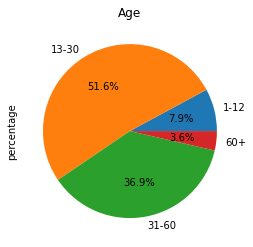

In [393]:
films_data.groupby('Age')['Movie'].count().plot(kind='pie',autopct='%1.1f%%', title='Age', ylabel='percentage')

### Gender

<AxesSubplot:title={'center':'Gender'}, ylabel='percentage'>

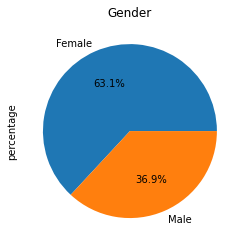

In [394]:
films_data.groupby('Gender')['Movie'].count().plot(kind='pie',autopct='%1.1f%%', title='Gender', ylabel='percentage')

### Martial Status

<AxesSubplot:title={'center':'Marital Status'}, ylabel='percentage'>

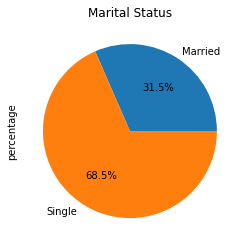

In [395]:
films_data.groupby('Marital_Status')['Movie'].count().plot(kind='pie',autopct='%1.1f%%', title='Marital Status',   ylabel='percentage')

### Income

<AxesSubplot:title={'center':'Income'}, ylabel='percentage'>

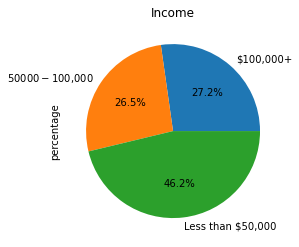

In [396]:
films_data.groupby('Income')['Movie'].count().plot(kind='pie',autopct='%1.1f%%', title='Income',  ylabel='percentage')

### Demographic summary

##### 1. 51.6% of the patrons belong to the age group of 13-30.
##### 2. 63.1% of the patrons are females.
##### 3. 68.5% of the patrons are of single.
##### 4. 46.2% of the patrons have income less than $50,000.

### 4. In what media outlet(s) should the film series be advertised?

<AxesSubplot:>

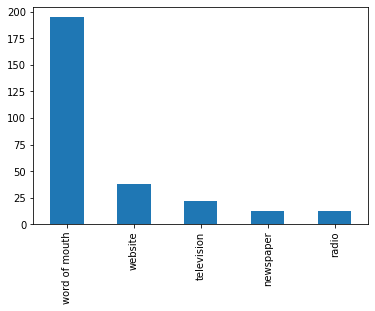

In [397]:
films_data.Hear_About.value_counts().plot(kind='bar')

##### As we can see that mainly people hear about Film on the Rocks using word of mouth, so for advertising the next majority comes from webite. Therefore Film on the Rocks series should be advertised on website. 